In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784", version=1, as_frame=False)
mnist.keys()

C:\Users\Ryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=mnist["data"], mnist["target"]
print(X.shape)
y.shape

(70000, 784)


(70000,)

(-0.5, 27.5, 27.5, -0.5)

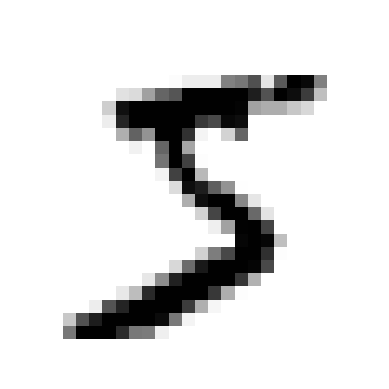

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

In [6]:
import numpy as np
y=y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(n_jobs=-1, random_state=42)

In [8]:
sgd_clf.predict([some_digit])

array([ True])

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [10]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [13]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [14]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [15]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [16]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [17]:
def plot_precision_recall_vs_threshold(precisions,recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])             

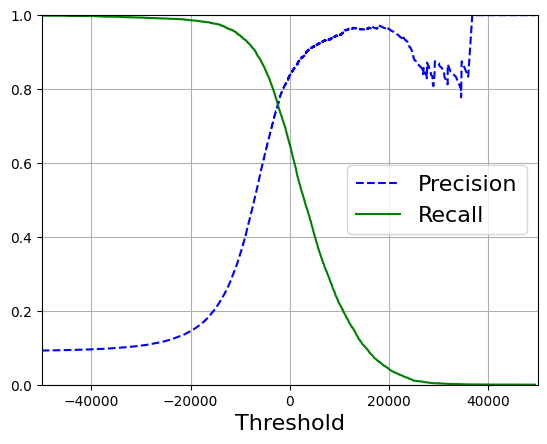

In [18]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


In [19]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.9)]
y_train_pred_90=(y_scores>=threshold_90_precision)

In [20]:
print(precision_score(y_train_5, y_train_pred_90))
recall_score(y_train_5, y_train_pred_90)

0.9000345901072293


0.4799852425751706

In [21]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [22]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],"k--")

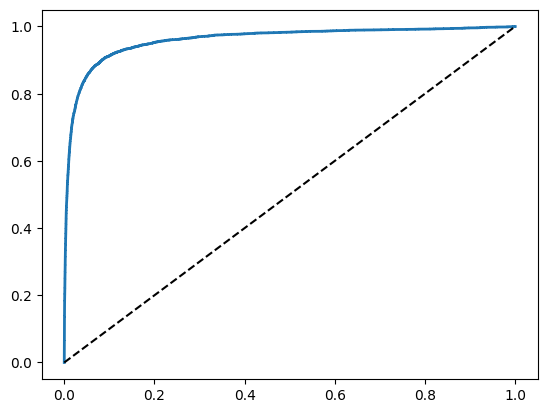

In [23]:
plot_roc_curve(fpr,tpr)


In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [25]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42, n_jobs=-1)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5,cv=3,method="predict_proba")

In [26]:
y_scores_forest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(y_train_5,y_scores_forest)

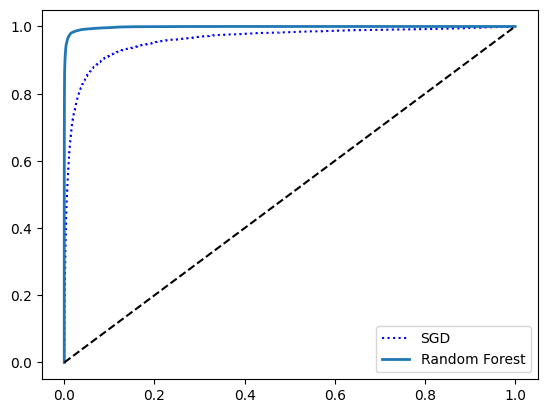

In [27]:
plt.plot(fpr,tpr,"b:",label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [28]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

In [29]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(precision_score(y_train_5,y_train_pred_forest))
recall_score(y_train_5,y_train_pred_forest)

0.9905083315756169


0.8662608374838591

In [30]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [31]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [32]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [33]:
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring="accuracy",n_jobs=-1)

array([0.87365, 0.85835, 0.8689 ])

In [35]:
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train,cv=3,n_jobs=-1)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

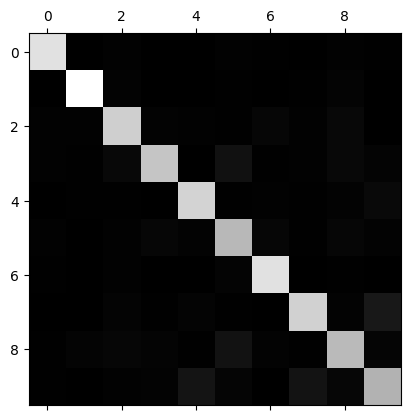

In [36]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [37]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

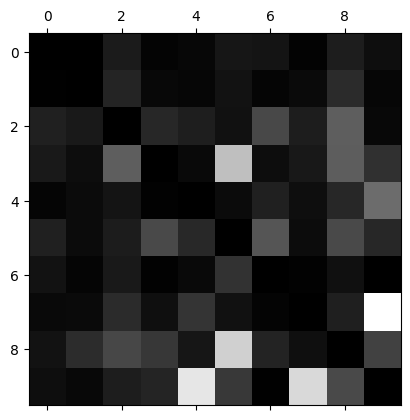

In [38]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

In [39]:
from scipy.ndimage import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [40]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier(n_jobs=-1)
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=10, n_jobs=-1)
grid_search.fit(X_train_augmented, y_train_augmented)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [42]:
grid_search.best_estimator_


KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [43]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

In [1]:
from sklearn.neighbors import KNeighborsClassifier
final=KNeighborsClassifier(n_jobs=-1,n_neighbors=4,weights="distance")

NameError: name 'KNeighborsClassifier' is not defined

In [44]:
import joblib 
joblib.dump(final, "finalModel.pk1")

['finalModel.pk1']

In [2]:
import tarfile
with tarfile.open('finalModel.tar.gz', 'w:gz') as tar:
    tar.add(r"C:\Users\Ryan\Documents\ML PROJECTS\MNIST\finalModel.pk1")